# Covid-19 Data Analysis of Indian States #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid19_df=pd.read_csv('covid_19_india.csv')
excel=pd.ExcelFile('States Population and Area.xlsx')

In [25]:
indian_states_df=excel.parse('Sheet1')
indian_states_df.head()

,State,Aadhaar assigned as of 2019,Area (per sq km)
0,Delhi,21763471,1483
1,Haryana,28941133,44212
2,Kerala,36475649,38852
3,Himachal Pradesh,7560770,55673
4,Punjab,30355185,50362


In [4]:
covid19_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [5]:
covid19_df.shape

(1318, 9)

In [6]:
covid19_df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [7]:
covid_latest=covid19_df[covid19_df['Date']=='25/04/20']
covid_latest.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1286,1287,25/04/20,5:00 PM,Andaman and Nicobar Islands,-,-,11,0,27
1287,1288,25/04/20,5:00 PM,Andhra Pradesh,-,-,171,31,1061
1288,1289,25/04/20,5:00 PM,Arunachal Pradesh,-,-,1,0,1
1289,1290,25/04/20,5:00 PM,Assam,-,-,19,1,36
1290,1291,25/04/20,5:00 PM,Bihar,-,-,46,2,228


In [8]:
covid_latest['Confirmed'].sum()

24893

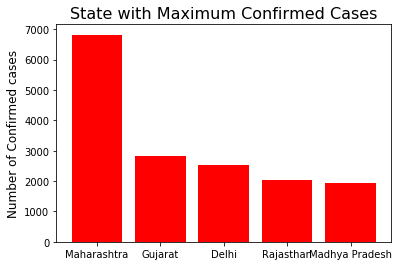

In [9]:
covid_latest=covid_latest.sort_values(by=['Confirmed'],ascending=False)

plt.bar(covid_latest['State/UnionTerritory'][:5],
       covid_latest['Confirmed'][:5],
       align='center',
       color='red')
plt.ylabel('Number of Confirmed cases',size=12)
plt.title('State with Maximum Confirmed Cases',size=16)
plt.show()

In [10]:
covid_latest['Deaths'].sum()

779

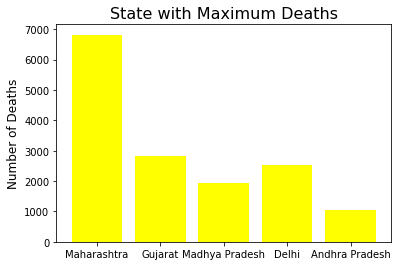

In [11]:
covid_latest=covid_latest.sort_values(by=['Deaths'],ascending=False)

plt.bar(covid_latest['State/UnionTerritory'][:5],
       covid_latest['Confirmed'][:5],
       align='center',
       color='yellow')
plt.ylabel('Number of Deaths',size=12)
plt.title('State with Maximum Deaths',size=16)
plt.show()

In [12]:
indian_states_df.head()

,State,Aadhaar assigned as of 2019,Area (per sq km)
0,Delhi,21763471,1483
1,Haryana,28941133,44212
2,Kerala,36475649,38852
3,Himachal Pradesh,7560770,55673
4,Punjab,30355185,50362


In [13]:
covid_latest=covid_latest.drop(['Sno','Date','Time','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1)
covid_latest.shape

(32, 4)

In [14]:
indian_states_df=indian_states_df[['State','Aadhaar assigned as of 2019']]
indian_states_df.columns=['State/UnionTerritory','Population']
indian_states_df.head()

,State/UnionTerritory,Population
0,Delhi,21763471
1,Haryana,28941133
2,Kerala,36475649
3,Himachal Pradesh,7560770
4,Punjab,30355185


## Cases Per 10 million ##

In [15]:
covid_latest=pd.merge(covid_latest,indian_states_df,on='State/UnionTerritory')
covid_latest['Cases/10million']=(covid_latest['Confirmed']/covid_latest['Population'])*10000000
covid_latest.head()

,State/UnionTerritory,Cured,Deaths,Confirmed,Population,Cases/10million
0,Maharashtra,957,301,6817,114063427,597.649937
1,Gujarat,265,127,2815,62097024,453.322852
2,Madhya Pradesh,210,92,1952,74770270,261.066330
3,Delhi,857,53,2514,21763471,1155.146622
4,Andhra Pradesh,171,31,1061,49145456,215.889746


In [16]:
covid_latest.fillna(0,inplace=True)
covid_latest.sort_values(by='Cases/10million',ascending=False)

,State/UnionTerritory,Cured,Deaths,Confirmed,Population,Cases/10million
3,Delhi,857,53,2514,21763471,1155.146622
22,Ladakh,14,0,20,210156,951.673995
0,Maharashtra,957,301,6817,114063427,597.649937
1,Gujarat,265,127,2815,62097024,453.322852
5,Rajasthan,230,27,2034,68936999,295.052008
2,Madhya Pradesh,210,92,1952,74770270,261.066330
7,Telengana,253,26,984,39184011,251.122837
21,Chandigarh,15,0,28,1131522,247.454314
8,Tamil Nadu,866,22,1755,72344821,242.588201
4,Andhra Pradesh,171,31,1061,49145456,215.889746


In [17]:
#df = covid_latest[(covid_latest['Confirmed']>=1000) | (covid_latest['Cases/10million']>=200)]
#plt.figure(figsize=(12,8), dpi=80)
#plt.scatter(covid_latest['Confirmed'], covid_latest['Cases/10million'], alpha=0.5)
#plt.xlabel('Number of confirmed Cases', size=12)
#plt.ylabel('Number of cases per 10 million people', size=12)
#plt.scatter(df['Confirmed'], df['Cases/10million'], color="red")
#for i in range(df.shape[0]):
 #   plt.annotate(df['State/UnionTerritory'].tolist()[i], xy=(df['Confirmed'].tolist()[i], df['Cases/10million'].tolist()[i]),
  #             xytext = (df['Confirmed'].tolist()[i]+1.0, df['Cases/10million'].tolist()[i]+12.0), size=11)
#plt.tight_layout()    
#plt.title('COVID 19 figures in different Indian states', size=16)
#plt.show()

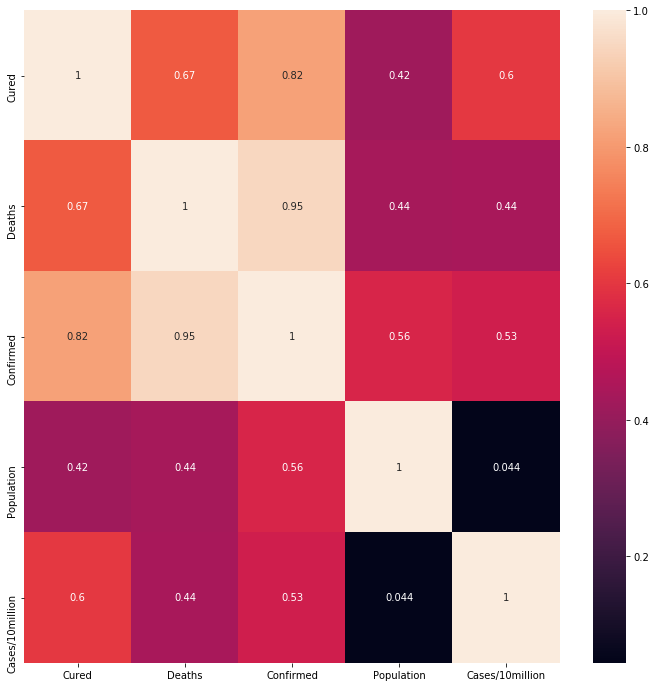

In [18]:
plt.figure(figsize = (12,12))
sns.heatmap(covid_latest.corr(), annot=True)

# Statewise Analysis #

In [19]:
covid19_delhi = covid19_df[covid19_df['State/UnionTerritory'] == 'Delhi']
covid19_delhi.reset_index(inplace = True)
covid19_delhi = covid19_delhi.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_delhi.reset_index(inplace = True)
covid19_delhi.columns = ['Day Count','Date','State/UnionTerritory','Deaths','Confirmed']
covid19_delhi['Day Count'] = covid19_delhi['Day Count'] + 1
print(covid19_delhi.shape)
covid19_delhi.head()

(55, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Delhi,0,1
1,2,03/03/20,Delhi,0,1
2,3,04/03/20,Delhi,0,1
3,4,05/03/20,Delhi,0,2
4,5,06/03/20,Delhi,0,3


In [20]:
covid19_bihar = covid19_df[covid19_df['State/UnionTerritory'] == 'Bihar']
covid19_bihar.reset_index(inplace = True)
covid19_bihar = covid19_bihar.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_bihar.reset_index(inplace = True)
covid19_bihar.columns = ['Day Count','Date','State/UnionTerritory','Deaths','Confirmed']
covid19_bihar['Day Count'] = covid19_bihar['Day Count'] + 1
print(covid19_bihar.shape)
covid19_bihar.head()

(35, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,22/03/20,Bihar,1,2
1,2,23/03/20,Bihar,1,2
2,3,24/03/20,Bihar,1,3
3,4,25/03/20,Bihar,1,4
4,5,26/03/20,Bihar,1,6


In [21]:
covid19_punjab = covid19_df[covid19_df['State/UnionTerritory'] == 'Punjab']
covid19_punjab.reset_index(inplace = True)
covid19_punjab= covid19_punjab.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_punjab.reset_index(inplace = True)
covid19_punjab.columns = ['Day Count','Date','State/UnionTerritory','Deaths','Confirmed']
covid19_punjab['Day Count'] = covid19_punjab['Day Count'] + 1
print(covid19_punjab.shape)
covid19_punjab.head()

(48, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,09/03/20,Punjab,0,1
1,2,10/03/20,Punjab,0,1
2,3,11/03/20,Punjab,0,1
3,4,12/03/20,Punjab,0,1
4,5,13/03/20,Punjab,0,1


In [22]:
covid19_kerala = covid19_df[covid19_df['State/UnionTerritory'] == 'Kerala']
covid19_kerala.reset_index(inplace = True)
covid19_kerala= covid19_kerala.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_kerala.reset_index(inplace = True)
covid19_kerala.columns = ['Day Count','Date','State/UnionTerritory','Deaths','Confirmed']
covid19_kerala['Day Count'] = covid19_kerala['Day Count'] + 1
print(covid19_kerala.shape)
covid19_kerala.head()

(87, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,30/01/20,Kerala,0,1
1,2,31/01/20,Kerala,0,1
2,3,01/02/20,Kerala,0,2
3,4,02/02/20,Kerala,0,3
4,5,03/02/20,Kerala,0,3


In [23]:
covid19_UP = covid19_df[covid19_df['State/UnionTerritory'] == "Uttar Pradesh"]
covid19_UP = covid19_UP.iloc[32:]
covid19_UP.reset_index(inplace = True)
covid19_UP = covid19_UP.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_UP.reset_index(inplace = True)
covid19_UP.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_UP['Day Count'] = covid19_UP['Day Count'] + 1
print(covid19_UP.shape)
covid19_UP.head()

(21, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,05/04/20,Uttar Pradesh,2,227
1,2,06/04/20,Uttar Pradesh,3,305
2,3,07/04/20,Uttar Pradesh,3,305
3,4,08/04/20,Uttar Pradesh,3,343
4,5,09/04/20,Uttar Pradesh,4,410


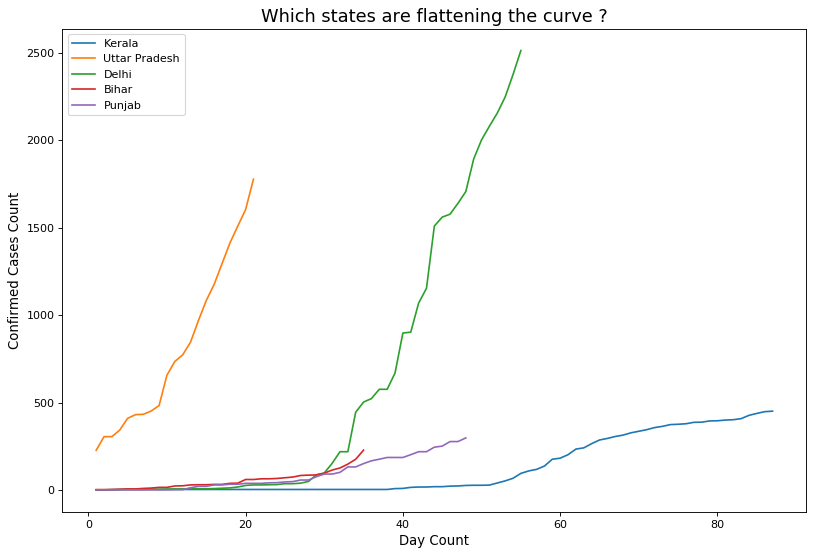

In [24]:
plt.figure(figsize=(12,8), dpi=80)
plt.plot(covid19_kerala['Day Count'], covid19_kerala['Confirmed'])
plt.plot(covid19_UP['Day Count'], covid19_UP['Confirmed'])
plt.plot(covid19_delhi['Day Count'], covid19_delhi['Confirmed'])
plt.plot(covid19_bihar['Day Count'], covid19_bihar['Confirmed'])
plt.plot(covid19_punjab['Day Count'], covid19_punjab['Confirmed'])
plt.legend(['Kerala', 'Uttar Pradesh', 'Delhi', 'Bihar', 'Punjab'], loc='upper left')
plt.xlabel('Day Count', size=12)
plt.ylabel('Confirmed Cases Count', size=12)
plt.title('Which states are flattening the curve ?', size = 16)
plt.show()